In [1]:
!pip install matplotlib
!pip install wordcloud

# My solution


In [2]:
import re
from urllib import request

In [3]:
url = "https://raw.githubusercontent.com/Daniil675/SeminarAssignmentZero/main/eugene_onegin.txt" #this is the link
text = request.urlopen(url).read().decode('utf8')

In [4]:
# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')

In [5]:
# Import package
import matplotlib.pyplot as plt

In [6]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [7]:
#url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt" #this is the link
#stopwords_text = request.urlopen(url).read().decode('utf8')
#stopwords_list = stopwords_text.splitlines()


import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('russian')
stop_words.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', '–', 'к', 'на', '...',
                   'иль','всё','le','фр','de','ль','ит','сей'
                  ])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phantoms/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#Freak Roman Numbers in text
def romanize(number):
   n2rMap = {1000:'M', 900:'CM', 500:'D', 400:'CD', 100:'C', 90:'XC', 50:'L', 40:'XL', 10:'X', 9:'IX', 5:'V', 4:'IV', 1:'I'}
   roman = ""
   for key in n2rMap.keys():
      count = int(number / key)
      roman += n2rMap[key] * count
      number -= key * count
   return roman

stop_romans = []

for chapter in range(52): stop_romans.append(romanize(chapter))
stop_words.extend(stop_romans)

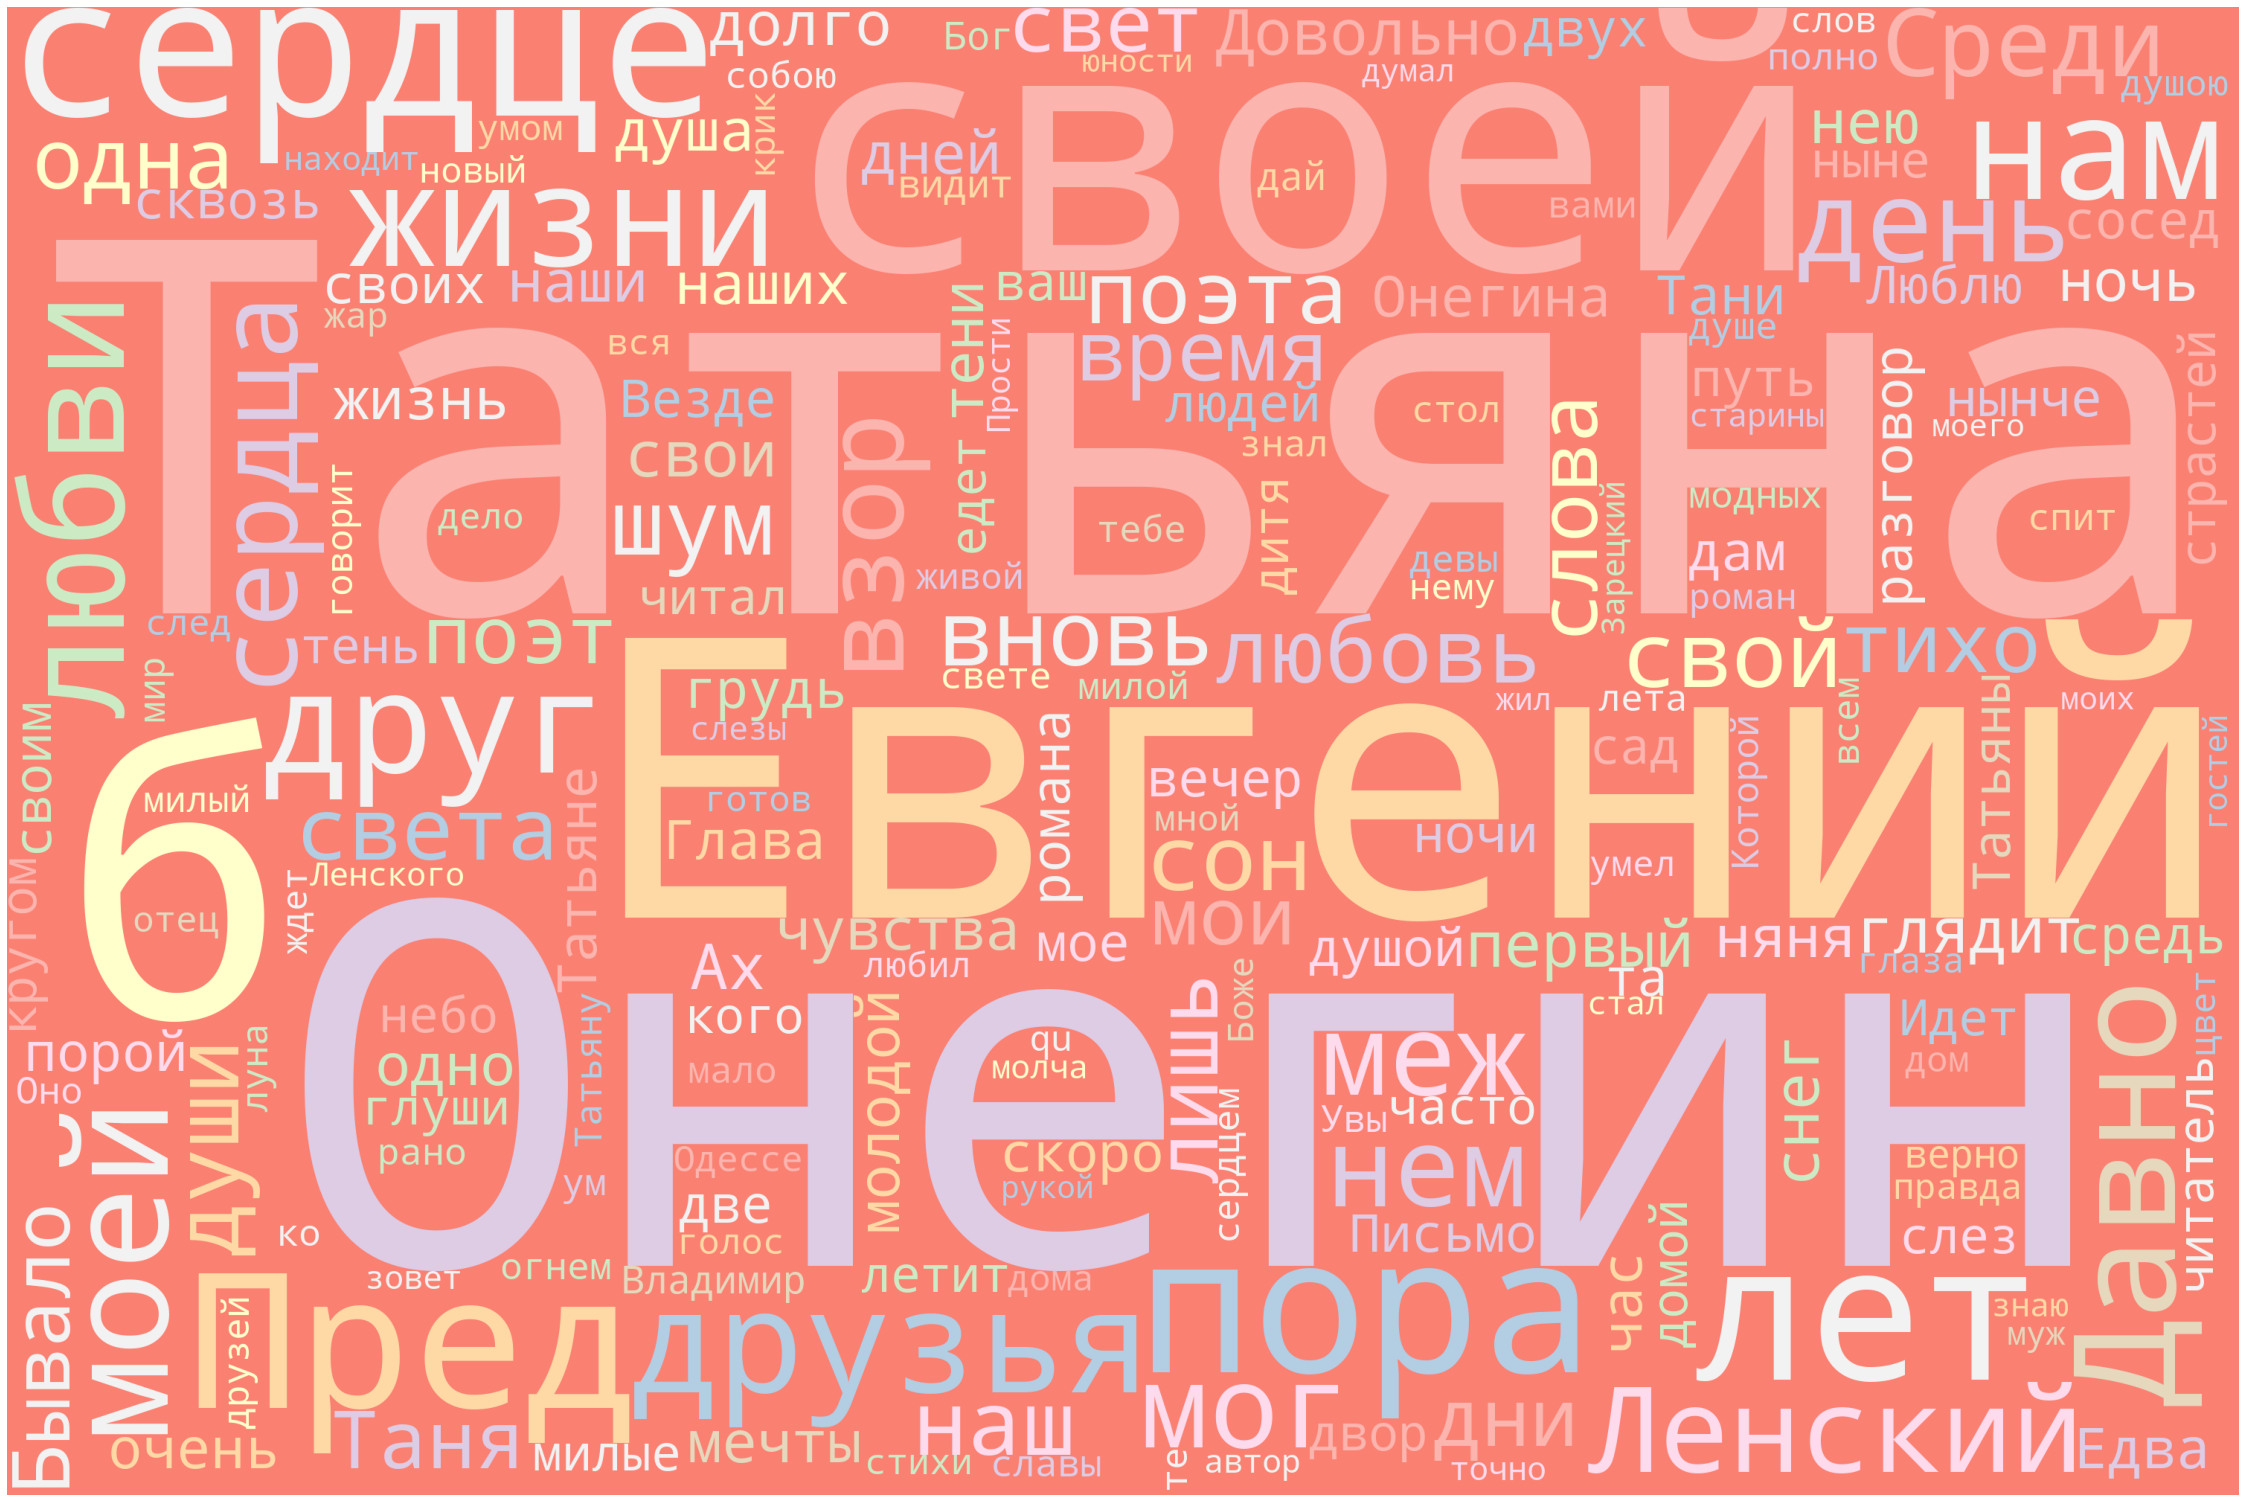

In [9]:
# Import package
from wordcloud import WordCloud#, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = stop_words).generate(text)
# Plot
plot_cloud(wordcloud)